# Implementation

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import log_loss

def linear(x):
    return x

def sigmoid( x):
    return 1/(1 + np.exp(-x))

class NeuralNetwork:
    
    def __init__(self, lr, max_iter, random_state=None):
        self.lr = lr
        self.max_iter = max_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        y = y.reshape(-1, 1)
        # Set random seed if self.random_state is not none
        if self.random_state is not None:
            np.random.seed(self.random_state)

        self.W1 = np.random.rand(30,10)
        self.b1 = np.random.rand(10)
        self.W2 = np.random.rand(10,1)
        self.b2 = np.random.rand(1)
        
        loss_history = []
        
        for i in range(self.max_iter):
            # ==== Forward ====
            Z2 = X @ self.W1 + self.b1
            A2 = linear(Z2)

            Z3 = A2 @ self.W2 + self.b2
            y_pred = sigmoid(Z3) # A3
            
            # Calculate loss/error
            loss = log_loss(y, y_pred)
            loss_history.append(loss)
            
            # ==== Backward ====
            # Element-wise loss required for partial d's
            e = (y_pred - y) # Delta_3
            
            # Output layer partial d's
            dW2 = A2.T @ e
            db2 = np.sum(e)
            
            # Hidden layer partial d's
            dW1 = X.T @ (e @ self.W2.T)
            db1 = np.sum(e @ self.W2.T, axis=0)

            # Update weights
            self.W1 = self.W1 - self.lr * dW1
            self.b1 = self.b1 - self.lr * db1
            self.W2 = self.W2 - self.lr * dW2
            self.b2 = self.b2 - self.lr * db2

        return loss_history

    def predict(self, X):
        y_pred = (self.predict_proba(X) > 0.5).astype(int)
        return y_pred
    
    def predict_proba(self, X):
        Z2 = X @ self.W1 + self.b1
        a2 = linear(Z2)
        
        Z3 = a2 @ self.W2 + self.b2
        A3 = sigmoid(Z3)

        return A3

# Inspect loss history

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import log_loss

# COPY YOUR CLASS DEFINITION HERE  
import numpy as np
import pandas as pd
from sklearn.metrics import log_loss

def linear(x):
    return x

def sigmoid( x):
    return 1/(1 + np.exp(-x))

class NeuralNetwork:
    
    def __init__(self, lr, max_iter, random_state=None):
        self.lr = lr
        self.max_iter = max_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        y = y.reshape(-1, 1)
        # Set random seed if self.random_state is not none
        if self.random_state is not None:
            np.random.seed(self.random_state)

        self.W1 = np.random.rand(30,10)
        self.b1 = np.random.rand(10)
        self.W2 = np.random.rand(10,1)
        self.b2 = np.random.rand(1)
        
        loss_history = []
        
        for i in range(self.max_iter):
            # ==== Forward ====
            Z2 = X @ self.W1 + self.b1
            A2 = linear(Z2)

            Z3 = A2 @ self.W2 + self.b2
            y_pred = sigmoid(Z3) # A3
            
            # Calculate loss/error
            loss = log_loss(y, y_pred)
            loss_history.append(loss)
            
            # ==== Backward ====
            # Element-wise loss required for partial d's
            e = (y_pred - y) # Delta_3
            
            # Output layer partial d's
            dW2 = A2.T @ e
            db2 = np.sum(e)
            
            # Hidden layer partial d's
            dW1 = X.T @ (e @ self.W2.T)
            db1 = np.sum(e @ self.W2.T, axis=0)

            # Update weights
            self.W1 = self.W1 - self.lr * dW1
            self.b1 = self.b1 - self.lr * db1
            self.W2 = self.W2 - self.lr * dW2
            self.b2 = self.b2 - self.lr * db2

        return loss_history

    def predict(self, X):
        y_pred = (self.predict_proba(X) > 0.5).astype(int)
        return y_pred
    
    def predict_proba(self, X):
        Z2 = X @ self.W1 + self.b1
        a2 = linear(Z2)
        
        Z3 = a2 @ self.W2 + self.b2
        A3 = sigmoid(Z3)

        return A3

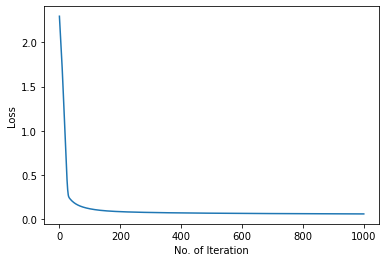

In [6]:
# LOAD 
data = pd.read_csv('data/train_w4.csv') 

X = data.iloc[:,:-1].to_numpy()
y = data.iloc[:, -1].to_numpy()

network = NeuralNetwork(0.0001, 1000, 6850)

loss_list = network.fit(X, y)

# PLOT THE LOSS HISTORY HERE
plt.plot(loss_list)

plt.xlabel('No. of Iteration')
plt.ylabel('Loss')

plt.show()

***

# Pytorch neural network

- ## 1. Define the network

In [8]:
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(2022)   # To make sure the results are reproducable
torch.manual_seed(2022)

class NeuralNetwork (torch.nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()   # Previously we dont have this line. Here we are initialising nn.Module       
        self.Identity = torch.nn.Identity()   # Define activations
        self.Sigmoid = torch.nn.Sigmoid()
        
        self.Linear1 = torch.nn.Linear(30, 10) # Define linear
        self.Linear2 = torch.nn.Linear(10, 1)
        
    def forward(self, X):
        Z2 = self.Linear1(X)      # first layer
        A2 = self.Identity(Z2)     # activation
        
        Z3 = self.Linear2(A2)      # to second layer
        a3 = self.Sigmoid(Z3)      # activation
        return a3

- ## 2. Initialize a Network (create an instance)

In [9]:
network = NeuralNetwork() 

- ## 3. Prepare Data for Training

In [10]:
data = pd.read_csv('data/train_w4.csv') 

X = torch.tensor(data.iloc[:,:-1].to_numpy()).float()
y = torch.tensor(data.iloc[:, -1].to_numpy()).float()

- ## 4. Define Objective Function and Optimizer

In [11]:
loss_func = torch.nn.BCELoss()
optimizer = torch.optim.Adam(network.parameters(), lr=0.0001)

- ## 5. Train the network

In [12]:
train_loss = []
iters = 20000
for i in range(iters):

    optimizer.zero_grad()

    y_pred = network(X)
    loss = loss_func(y_pred, y.view(-1,1))  # We must make both y_pred and y in the exact same shape
    
    loss.backward()
    optimizer.step()
    train_loss.append(loss.item()) 

    if i % 1000 == 0:
        print('Loss in iteration {}: {:.4f}'.format(i, loss.item()))

Loss in iteration 0: 0.8831
Loss in iteration 1000: 0.2128
Loss in iteration 2000: 0.1110
Loss in iteration 3000: 0.0812
Loss in iteration 4000: 0.0682
Loss in iteration 5000: 0.0610
Loss in iteration 6000: 0.0561
Loss in iteration 7000: 0.0520
Loss in iteration 8000: 0.0477
Loss in iteration 9000: 0.0434
Loss in iteration 10000: 0.0393
Loss in iteration 11000: 0.0356
Loss in iteration 12000: 0.0323
Loss in iteration 13000: 0.0292
Loss in iteration 14000: 0.0261
Loss in iteration 15000: 0.0233
Loss in iteration 16000: 0.0208
Loss in iteration 17000: 0.0185
Loss in iteration 18000: 0.0164
Loss in iteration 19000: 0.0145


- ## 6. Plot the loss

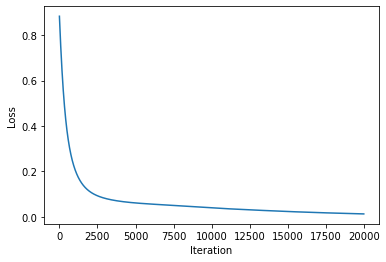

In [13]:
# Plotting
plt.plot(train_loss)

plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

***

# Pytorch neural network in practice

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import torch
from torch import nn 
import torch.nn.functional as F
from torch.utils import data

np.random.seed(0)
torch.manual_seed(0)

- ## 1. Read dataset and preprocessing

In [15]:
wine_df = pd.read_csv('data/winequality-white.csv', delimiter=";")
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [16]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [17]:
# check how many classes we have
# notice we don't have quality = 1 or 2. So we need to change the class idx to 0 - 6
print(wine_df['quality'].unique())
print()
wine_df['quality'] = wine_df['quality'] - 3 # change the response value
print(wine_df['quality'].unique())

[6 5 7 8 4 3 9]

[3 2 4 5 1 0 6]


In [18]:
# we have 7 classes and 11 features
n_class = len(wine_df['quality'].unique())
n_features = wine_df.shape[1] - 1

print('number of classes:', n_class)
print('number of features:', n_features)

number of classes: 7
number of features: 11


In [19]:
# Train-test split

# extract features and responses
X = wine_df.iloc[:, :-1].values
y = wine_df['quality'].values

# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
# Normalization

# NOTE: fit only on train set because you cannot use test set information for preprocessing!!
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# further split into training and val set
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  test_size=0.25,
                                                  random_state=0) # 0.25 x 0.8 = 0.2

In [22]:
# convert to torch object
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).long()
X_val = torch.from_numpy(X_val).float()
y_val = torch.from_numpy(y_val).long()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).long()

In [23]:
# print the size for train, val and test data
print('train size:', X_train.shape)
print('val size:', X_val.shape)
print('test size:', X_test.shape)

train size: torch.Size([2938, 11])
val size: torch.Size([980, 11])
test size: torch.Size([980, 11])


- ## 2. Define a neural network model class

In [24]:
class NNClassifier(torch.nn.Module):
    def __init__(self, inputSize, hiddenSize, outputSize):
        '''
            inputSize: input dim
            hiddenSize: hidden dim
            outputSize: output dim (should be number of classes)
        '''
        super().__init__()

        # here we only set 1 hidden layer, you can add more if you want
        self.Linear1 = nn.Linear(inputSize, hiddenSize) 
        self.Linear2 = nn.Linear(hiddenSize, outputSize)

        # relu activation
        self.act1 = nn.ReLU()
        
                    
    def forward(self, x):
        
        # apply the first linear layer
        x = self.Linear1(x)
        
        # apply the activation
        x = self.act1(x)

        # apply the second linear layer
        # (we don't need to apply activation for the output layer)
        x = self.Linear2(x)
        
        return x

In [25]:
# initialize the model
model = NNClassifier(n_features, 8, n_class)

In [26]:
# let's see how many parameters we have
for name, param in model.named_parameters():
    print(name, param.shape)

Linear1.weight torch.Size([8, 11])
Linear1.bias torch.Size([8])
Linear2.weight torch.Size([7, 8])
Linear2.bias torch.Size([7])


- ## 3. Define loss and optimizer

In [27]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

- ## 4. Train the model

In [28]:
# select batch size, usually as a power of 2
N = X_train.shape[0]
batchSize = 256

# ====== Step 3 =========
epochs = 10000
for i in range(epochs):
    
    # select a random batch
    randomIdx = torch.randint(0, N, (batchSize,))
    x_batch = X_train[randomIdx]
    y_batch = y_train[randomIdx]
    
    # zero the parameter gradients
    optimizer.zero_grad()

    # calulate output and loss 
    output = model(x_batch)
    loss = loss_fn(output, y_batch)

    # backprop and take a step
    loss.backward()
    optimizer.step()

    if i % 50 == 0:
        
        # Note we need to deactivate training (by not require gradient) and move to validation phase
        model.eval()
        with torch.no_grad():
            output_val = model(X_val)

            # calculate prediction and accuracy
            y_pred = torch.argmax(output_val, dim = 1) # find out the class prediction
            acc = (y_pred == y_val).float().sum()/y_val.shape[0]
        
        model.train() 

        print('Epoch {}: {:.4f} (Train) {:.4f} (Val acc)'.format(i, loss, acc))

Epoch 0: 2.0727 (Train) 0.2388 (Val acc)
Epoch 50: 1.2229 (Train) 0.4531 (Val acc)
Epoch 100: 1.2112 (Train) 0.4531 (Val acc)
Epoch 150: 1.1794 (Train) 0.4990 (Val acc)
Epoch 200: 1.1413 (Train) 0.5224 (Val acc)
Epoch 250: 1.1745 (Train) 0.5347 (Val acc)
Epoch 300: 1.2209 (Train) 0.5296 (Val acc)
Epoch 350: 1.0527 (Train) 0.5408 (Val acc)
Epoch 400: 1.0713 (Train) 0.5378 (Val acc)
Epoch 450: 1.1029 (Train) 0.5490 (Val acc)
Epoch 500: 1.0814 (Train) 0.5480 (Val acc)
Epoch 550: 1.1757 (Train) 0.5490 (Val acc)
Epoch 600: 1.0313 (Train) 0.5408 (Val acc)
Epoch 650: 1.0525 (Train) 0.5327 (Val acc)
Epoch 700: 1.0044 (Train) 0.5408 (Val acc)
Epoch 750: 1.1190 (Train) 0.5265 (Val acc)
Epoch 800: 1.0406 (Train) 0.5378 (Val acc)
Epoch 850: 1.0775 (Train) 0.5378 (Val acc)
Epoch 900: 1.1330 (Train) 0.5286 (Val acc)
Epoch 950: 1.1611 (Train) 0.5480 (Val acc)
Epoch 1000: 1.0982 (Train) 0.5551 (Val acc)
Epoch 1050: 1.0449 (Train) 0.5500 (Val acc)
Epoch 1100: 1.1656 (Train) 0.5571 (Val acc)
Epoch 1150:

In [29]:
# predict test data for NN
output_test = model(X_test)
y_pred = torch.argmax(output_test, dim = 1)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       1.00      0.06      0.11        51
           2       0.59      0.46      0.52       295
           3       0.48      0.76      0.59       409
           4       0.49      0.26      0.34       183
           5       0.00      0.00      0.00        33

    accuracy                           0.51       980
   macro avg       0.43      0.26      0.26       980
weighted avg       0.52      0.51      0.47       980

[[  0   0   3   6   0   0]
 [  0   3  25  21   2   0]
 [  0   0 136 157   2   0]
 [  0   0  63 311  35   0]
 [  0   0   4 132  47   0]
 [  0   0   0  24   9   0]]


C:\Users\Public\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Public\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Public\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
# let's compare against a baseline model logistic regression
from sklearn.linear_model import LogisticRegression
lg_clf = LogisticRegression().fit(X_train, y_train)
y_pred = lg_clf.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        51
           2       0.54      0.44      0.48       295
           3       0.47      0.82      0.60       409
           4       0.62      0.13      0.21       183
           5       0.00      0.00      0.00        33

    accuracy                           0.50       980
   macro avg       0.27      0.23      0.22       980
weighted avg       0.48      0.50      0.44       980

[[  0   0   5   4   0   0]
 [  0   0  27  23   1   0]
 [  0   0 129 166   0   0]
 [  0   0  66 334   9   0]
 [  0   0  11 149  23   0]
 [  0   0   0  29   4   0]]


C:\Users\Public\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Public\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Public\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 i

In [31]:
# Currently, the prediction from our neural network is not good. This may be because the hyperparameters are not tuned.